In [ ]:
#download relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
origdf=pd.read_csv('train_s3TEQDk.csv')

#Exploratory Data Analysis

In [ ]:
origdf.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
origdf.isna().sum(axis=0)

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [ ]:
origdf['Credit_Product'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [ ]:
origdf.shape

(245725, 11)

In [ ]:
workdf=origdf.copy()

#Check Relationships Among Variables

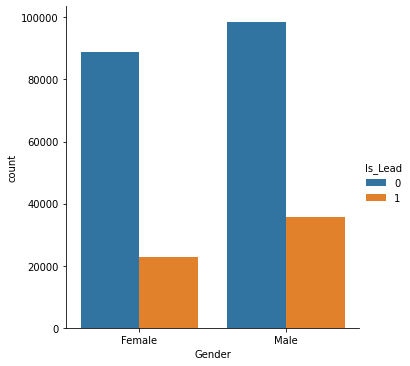

In [ ]:
sns.catplot(x='Gender',hue='Is_Lead', data=origdf,kind='count')

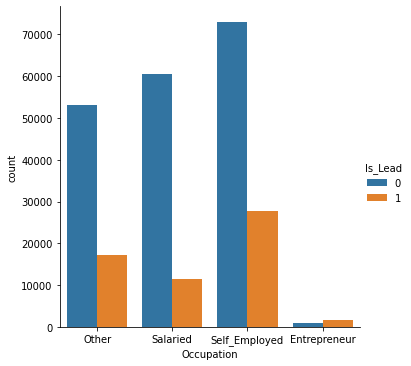

In [ ]:
sns.catplot(x='Occupation',hue='Is_Lead', data=origdf,kind='count')

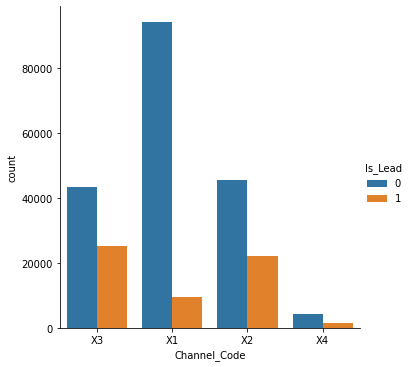

In [ ]:
sns.catplot(x='Channel_Code',hue='Is_Lead', data=origdf,kind='count')

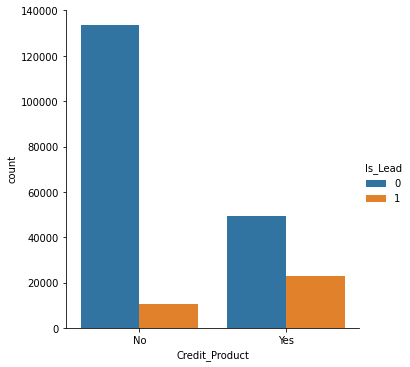

In [ ]:
sns.catplot(x='Credit_Product',hue='Is_Lead', data=origdf,kind='count')

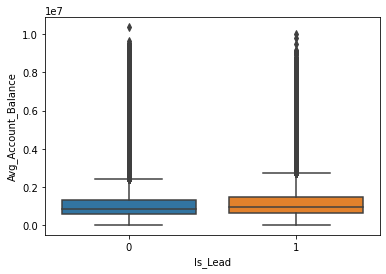

In [ ]:
sns.boxplot(x='Is_Lead',y='Avg_Account_Balance',data = origdf)

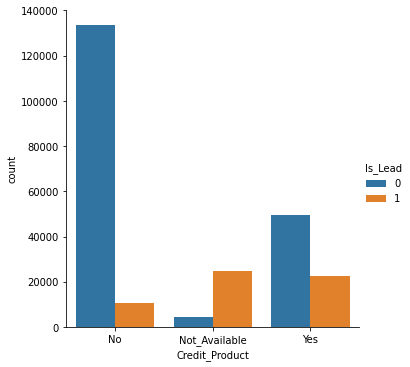

In [ ]:
#checking relationship of Is_Lead with Credit_Product
tempdf=pd.DataFrame()
tempdf['Credit_Product']=origdf['Credit_Product']
tempdf['Is_Lead']=origdf['Is_Lead']
tempdf.fillna(value='Not_Available',axis=0,inplace=True)
sns.catplot(x='Credit_Product',hue='Is_Lead',data=tempdf,kind='count')

#Data Encoding and Feature Selection

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
workdf.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [ ]:
#start label encoding of data
le=LabelEncoder()

In [ ]:
catcols=['Gender', 'Occupation', 'Channel_Code',
       'Credit_Product', 'Is_Active']
for i in catcols:
    workdf[i]=le.fit_transform(workdf[i].astype(str))

In [ ]:
#convert all region codes to integers since this will also take into account
# there geographic location
def convertRegion(astring):
    return int(astring[2:])

workdf['Region_Code']=workdf['Region_Code'].apply(convertRegion)

In [ ]:
workdf.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,268,1,2,43,0,1045696,0,0
1,IDD62UNG,0,30,277,2,0,32,0,581988,0,0
2,HD3DSEMC,0,56,268,3,2,26,0,1484315,1,0
3,BF3NC7KV,1,34,270,2,0,19,0,470454,0,0
4,TEASRWXV,0,30,282,2,0,33,0,886787,0,0


In [ ]:
#view numeric encoding of categorical columns
for i in catcols:
    print(workdf[i].unique())

[0 1]
[1 2 3 0]
[2 0 1 3]
[0 2 1]
[0 1]


#Start Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [ ]:
workdf2=workdf.copy()

In [ ]:
# convert all null values in Credit_Product to 1 since 1 has highest 
# probability of generating a lead on credit card
def convert2s(x):
    if x==2:
        return 1
    else:
        return x

In [ ]:
workdf2['Credit_Product']=workdf2['Credit_Product'].apply(convert2s)

In [ ]:
workdf2['Credit_Product'].unique()

array([0, 1])

In [ ]:
workdf2.drop(columns=['ID'],inplace=True)

In [ ]:
workdf2.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,268,1,2,43,0,1045696,0,0
1,0,30,277,2,0,32,0,581988,0,0
2,0,56,268,3,2,26,0,1484315,1,0
3,1,34,270,2,0,19,0,470454,0,0
4,0,30,282,2,0,33,0,886787,0,0


In [ ]:
# one hot encoding the data
ohedworkdf2=pd.get_dummies(workdf2,columns=['Occupation','Channel_Code'],drop_first=True)

In [ ]:
ohedworkdf2.head()

,Gender,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_1,Occupation_2,Occupation_3,Channel_Code_1,Channel_Code_2,Channel_Code_3
0,0,73,268,43,0,1045696,0,0,1,0,0,0,1,0
1,0,30,277,32,0,581988,0,0,0,1,0,0,0,0
2,0,56,268,26,0,1484315,1,0,0,0,1,0,1,0
3,1,34,270,19,0,470454,0,0,0,1,0,0,0,0
4,0,30,282,33,0,886787,0,0,0,1,0,0,0,0


In [ ]:
ohedworkdf2.shape

(245725, 14)

# Work with model

In [ ]:
y=ohedworkdf2['Is_Lead'].copy()
X=ohedworkdf2.drop(columns='Is_Lead').copy()

In [ ]:
X.head()

,Gender,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Occupation_1,Occupation_2,Occupation_3,Channel_Code_1,Channel_Code_2,Channel_Code_3
0,0,73,268,43,0,1045696,0,1,0,0,0,1,0
1,0,30,277,32,0,581988,0,0,1,0,0,0,0
2,0,56,268,26,0,1484315,1,0,0,1,0,1,0
3,1,34,270,19,0,470454,0,0,1,0,0,0,0
4,0,30,282,33,0,886787,0,0,1,0,0,0,0


In [ ]:
X.shape

(245725, 13)

In [ ]:
y.shape

(245725,)

In [ ]:
# split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

#Prepare Model and Evaluate

In [ ]:
#model 1 randomforest
rf1=RandomForestClassifier(n_estimators=101)

In [ ]:
rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=101,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=rf1.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.8106568273691636


In [ ]:
#perform k-fold cross validation for all models
from sklearn.model_selection import RepeatedKFold, cross_val_score

In [ ]:
cv=RepeatedKFold(n_splits=10, n_repeats=3)

rep_acc_rf1=cross_val_score(rf1, X_train, y_train, scoring='accuracy',cv=cv,n_jobs=-1)

print((rep_acc_rf1.mean()),(rep_acc_rf1.std()))
print(rep_acc_rf1)

0.8101278892880306 0.002838247961165581
[0.81285972 0.81181327 0.81198768 0.80594152 0.8076856  0.81227836
 0.80966223 0.8122093  0.81145349 0.81087209 0.81001105 0.81192954
 0.80751119 0.81192954 0.81111563 0.80355793 0.81053427 0.81046512
 0.81389535 0.81017442 0.8125109  0.80925528 0.80524388 0.80483693
 0.81413871 0.80919714 0.81512703 0.80639535 0.81139535 0.80784884]


In [ ]:
# since model is showing consistent values
# therefore we can say no overfitting

In [ ]:
#model 2 XGBoost
from xgboost import XGBClassifier

In [ ]:
xgb1=XGBClassifier(n_estimators=101)

In [ ]:
xgb1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=101, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgby_pred=xgb1.predict(X_test)

In [ ]:
print(accuracy_score(xgby_pred,y_test))

0.8248324696817603


In [ ]:
cv=RepeatedKFold(n_splits=10, n_repeats=3)

rep_acc_xgb1=cross_val_score(xgb1, X_train, y_train, scoring='accuracy',cv=cv,n_jobs=-1)

print((rep_acc_xgb1.mean()),(rep_acc_xgb1.std()))
print(rep_acc_xgb1)

0.8246815429876306 0.0025935694362461824
[0.82611476 0.82256846 0.82623103 0.82454508 0.82268473 0.82384745
 0.82018487 0.82668605 0.82523256 0.82901163 0.82297541 0.82774257
 0.82564967 0.83053311 0.82332423 0.82373118 0.8242544  0.82587209
 0.81994186 0.82459302 0.82413813 0.82431254 0.82582408 0.82530085
 0.82599849 0.83053311 0.82332423 0.82186047 0.82331395 0.82011628]


In [ ]:
# since model is showing consistent values
# therefore we can say no overfitting

In [ ]:
# model 3 lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
gbm1=LGBMClassifier()

In [ ]:
gbm1.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
gbpred=gbm1.predict(X_test)

In [ ]:
print(accuracy_score(gbpred,y_test))

0.8254157736238097


In [ ]:
cv=RepeatedKFold(n_splits=10, n_repeats=3)

rep_acc_gbm1=cross_val_score(gbm1, X_train, y_train, scoring='accuracy',cv=cv,n_jobs=-1)

print((rep_acc_gbm1.mean()),(rep_acc_gbm1.std()))
print(rep_acc_gbm1)

0.8244373739538309 0.0028507566938966227
[0.82082437 0.83105633 0.82413813 0.8194291  0.82460322 0.82878902
 0.82745189 0.82604651 0.82273256 0.82098837 0.82268473 0.82652171
 0.82030115 0.82158014 0.82355677 0.82524272 0.82326609 0.82901163
 0.82401163 0.82593023 0.82099878 0.82646358 0.82768444 0.82861462
 0.82506831 0.82460322 0.8221615  0.82348837 0.82406977 0.82180233]


In [ ]:
# since model is showing consistent values
# therefore we can say no overfitting

#Import Test File and Predict Using Model

In [ ]:
testfile=pd.read_csv('test_mSzZ8RL.csv')

In [ ]:
testfile.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [ ]:
testfile.isna().sum(axis=0)

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [ ]:
testfile.fillna('Yes',inplace=True)

In [ ]:
inptest=testfile.drop(columns=['ID'])

In [ ]:
#convert region code to numeric column
def convertRegion(astring):
    return int(astring[2:])

inptest['Region_Code']=inptest['Region_Code'].apply(convertRegion)

In [ ]:
inptest.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,254,Other,X1,25,Yes,742366,No
1,Male,43,268,Other,X2,49,Yes,925537,No
2,Male,31,270,Salaried,X1,14,No,215949,No
3,Male,29,272,Other,X1,33,No,868070,No
4,Female,29,270,Other,X1,19,No,657087,No


In [ ]:
# label encoding of categorical columns
catcols=['Gender', 'Occupation', 'Channel_Code',
       'Credit_Product', 'Is_Active']
for i in catcols:
    inptest[i]=le.fit_transform(inptest[i].astype(str))

In [ ]:
inptest.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,254,1,0,25,1,742366,0
1,1,43,268,1,1,49,1,925537,0
2,1,31,270,2,0,14,0,215949,0
3,1,29,272,1,0,33,0,868070,0
4,0,29,270,1,0,19,0,657087,0


In [ ]:
# one hot encoding of data
inptestnext=pd.get_dummies(inptest,columns=['Occupation','Channel_Code'],drop_first=True)

In [ ]:
inptestnext.head()

,Gender,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Occupation_1,Occupation_2,Occupation_3,Channel_Code_1,Channel_Code_2,Channel_Code_3
0,1,29,254,25,1,742366,0,1,0,0,0,0,0
1,1,43,268,49,1,925537,0,1,0,0,1,0,0
2,1,31,270,14,0,215949,0,0,1,0,0,0,0
3,1,29,272,33,0,868070,0,1,0,0,0,0,0
4,0,29,270,19,0,657087,0,1,0,0,0,0,0


In [ ]:
#predict probabilities using best model i.e. model lightgbm
op=gbm1.predict_proba(inptestnext)

In [ ]:
op.shape

(105312, 2)

In [ ]:
#create dataframe for output
opdict={'ID':testfile['ID'],'Is_Lead':pd.Series(op[:,1])}

In [ ]:
opcsv=pd.concat(opdict,axis=1)

In [ ]:
# export to csv file
finalsubmission=opcsv.to_csv('finalsubmission.csv')